In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold, RFECV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as ss



/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# EDA

## Descriptive Analysis

In [ ]:
fraud_oracle_path = 'fraud_oracle.csv'

# Read the files into pandas DataFrames
fraud_oracle_df = pd.read_csv(fraud_oracle_path)

# Display the first few rows of each dataset to understand their structure
fraud_oracle_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:\n")
print(fraud_oracle_df.describe())
print("\n")

Summary Statistics for Numerical Columns:

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min  

## Check for missing values in columns

In [ ]:
print("Missing Values in Each Column:\n")
print(fraud_oracle_df.isnull().sum())
print("\n")

Missing Values in Each Column:

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64




In [ ]:
# Get data types and value counts for categorical variables
data_info = {
    #"Column": fraud_oracle_df.columns,
    "DataType": fraud_oracle_df.dtypes,
    "UniqueValues": fraud_oracle_df.nunique(),
}

data_info_df = pd.DataFrame(data_info).sort_values(by="UniqueValues")

# Display missing values and data types for initial preprocessing
data_info_df

,DataType,UniqueValues
WitnessPresent,object,2
AgentType,object,2
FraudFound_P,int64,2
AccidentArea,object,2
PoliceReportFiled,object,2
Fault,object,2
Sex,object,2
Year,int64,3
BasePolicy,object,3
VehicleCategory,object,3


In [ ]:
# Convert Int to Object Datatype for All features other than 'AgeOfPolicyHolder' & 'PolicyNumber'
for feature in fraud_oracle_df.select_dtypes(include=['int']):
    if feature not in ['Age', 'PolicyNumber']:
        fraud_oracle_df[feature] = fraud_oracle_df[feature].astype('object')

## Distribution of Fraud

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/1855073814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FraudFound_P', data=fraud_oracle_df, order=fraud_oracle_df['FraudFound_P'].value_counts().index, palette='Set2')


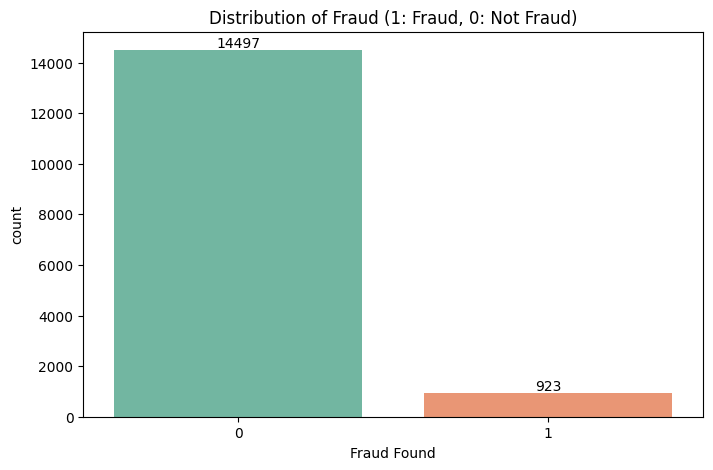

In [ ]:
fraud_counts = fraud_oracle_df['FraudFound_P'].value_counts().reset_index()
fraud_counts.columns = ['FraudFound_P', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='FraudFound_P', data=fraud_oracle_df, order=fraud_oracle_df['FraudFound_P'].value_counts().index, palette='Set2')
plt.title(f"Distribution of Fraud (1: Fraud, 0: Not Fraud)")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.xlabel("Fraud Found")
plt.show()

## Distribution of Fraud Cases for Categorical Features

In [ ]:
# Filter the dataset to only include fraud cases
fraud_cases_df = fraud_oracle_df[fraud_oracle_df['FraudFound_P'] == 1]

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


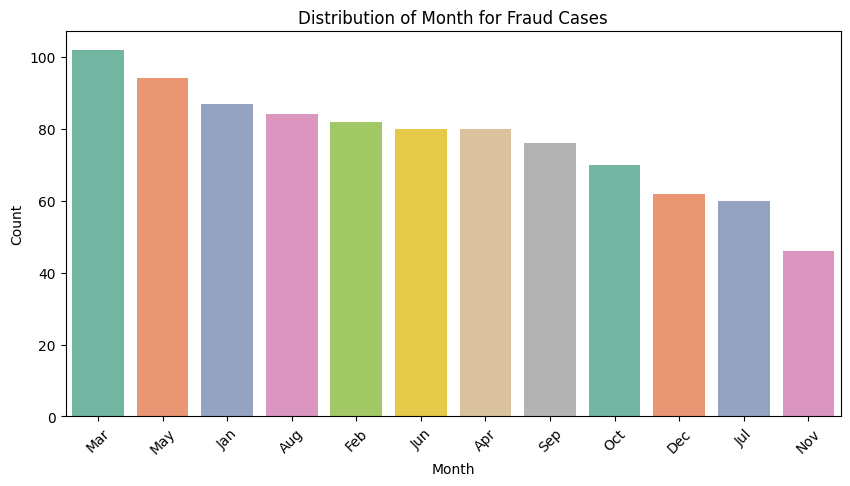

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


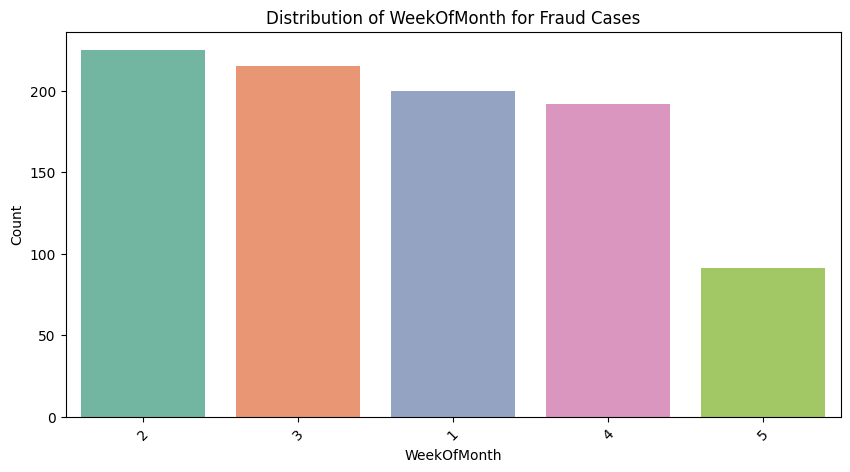

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


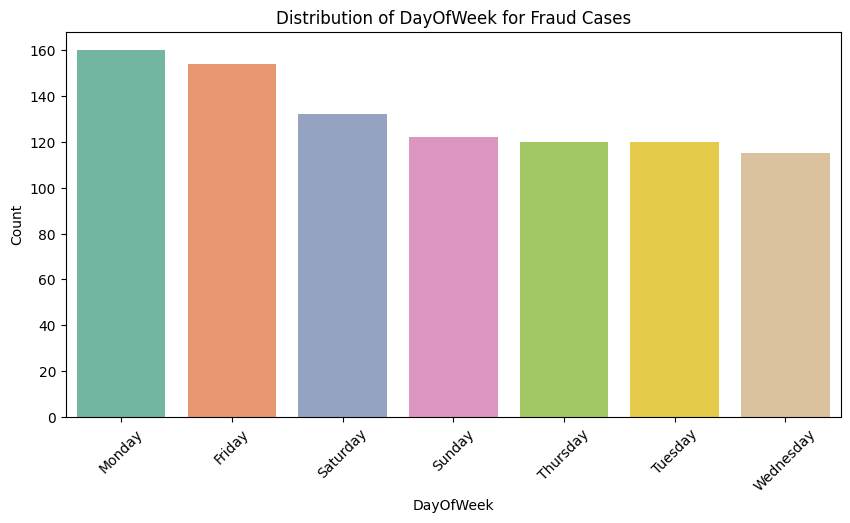

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


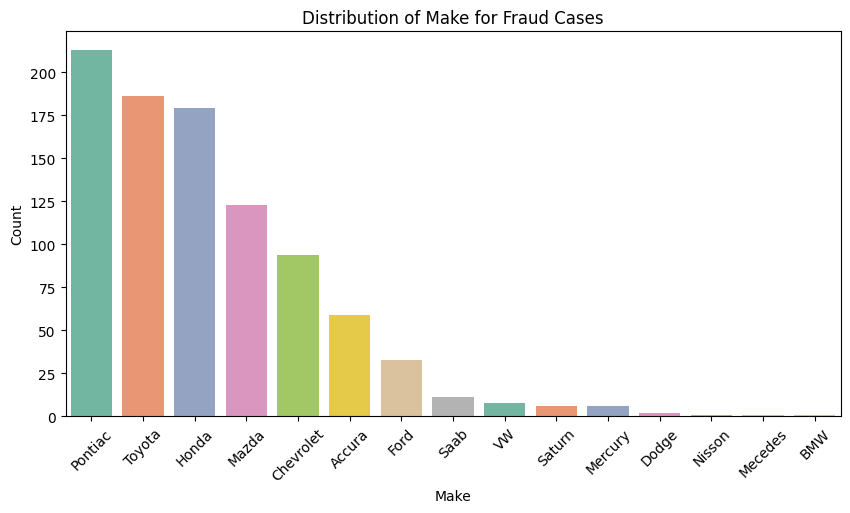

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


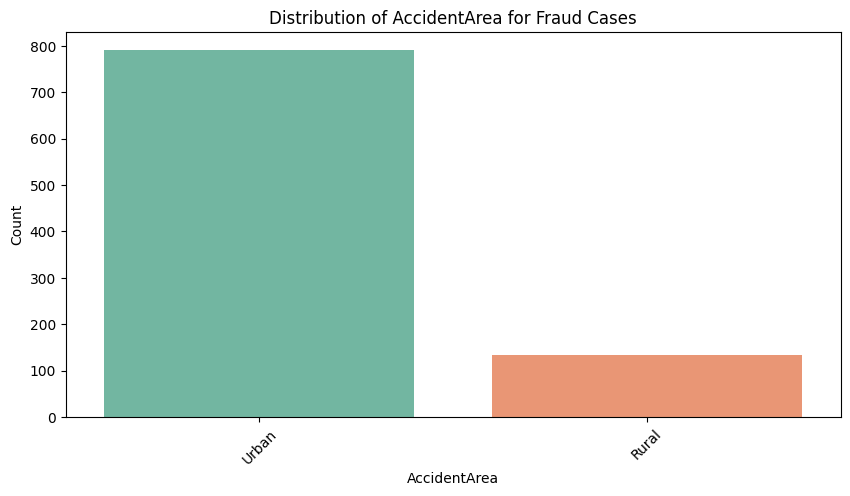

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


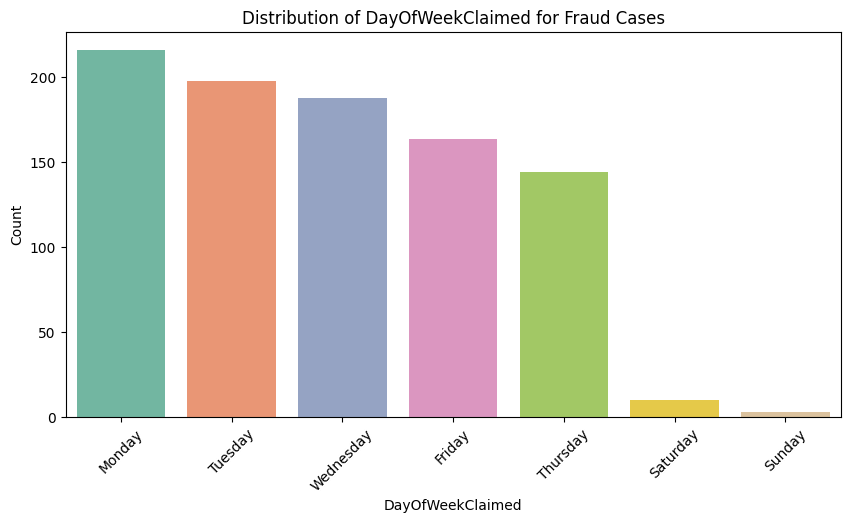

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


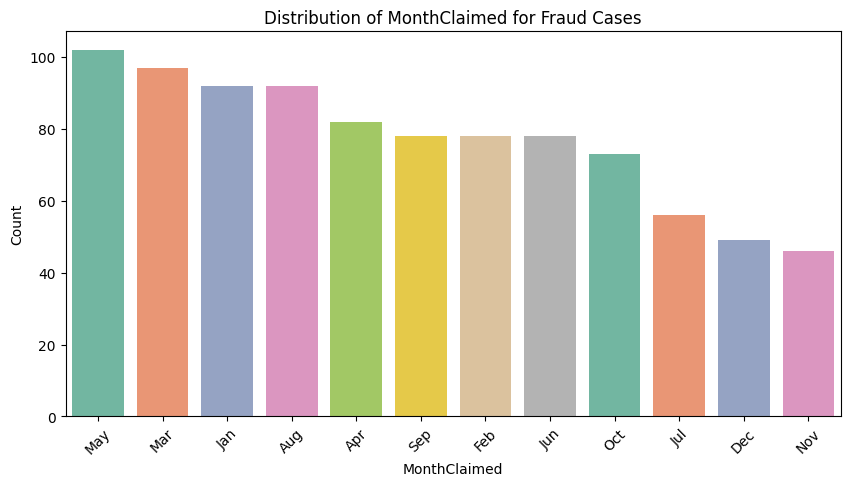

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


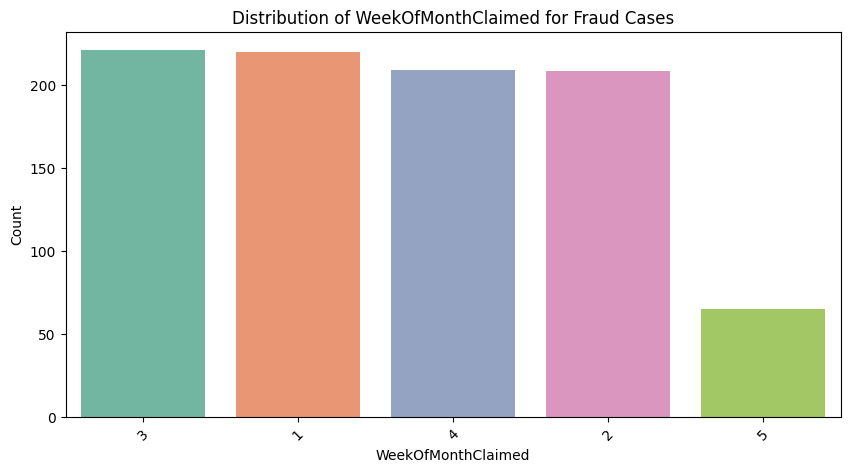

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


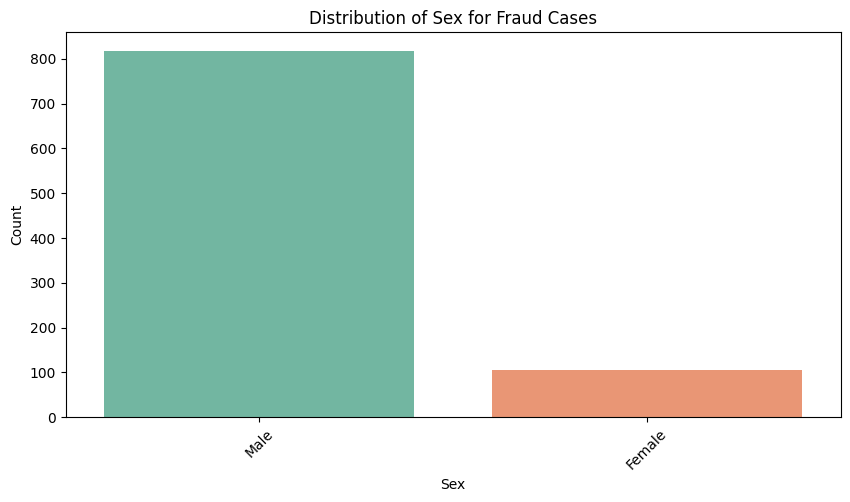

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


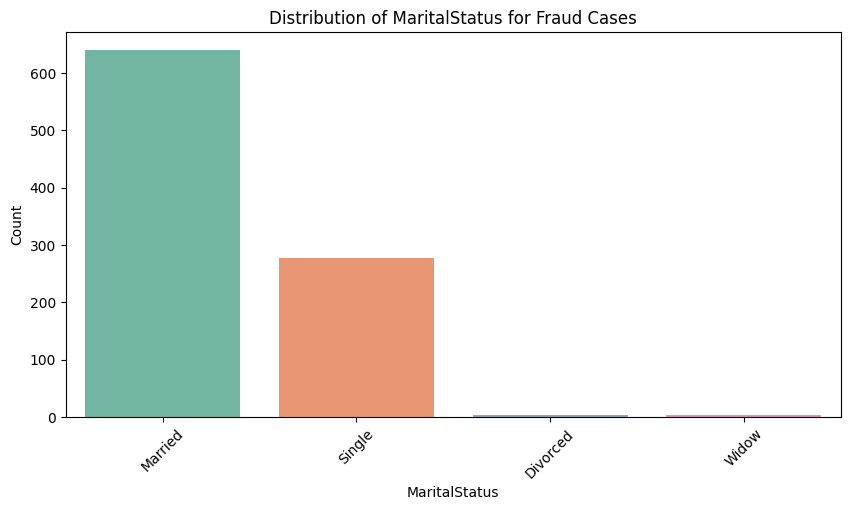

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


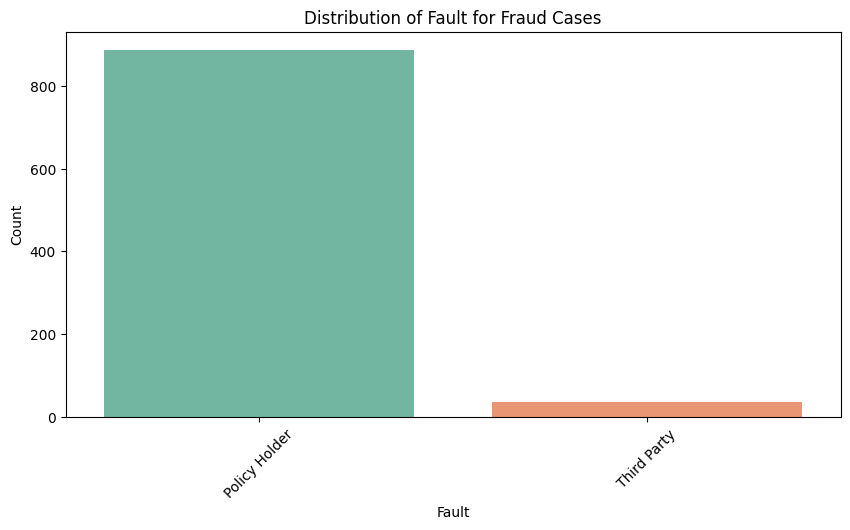

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


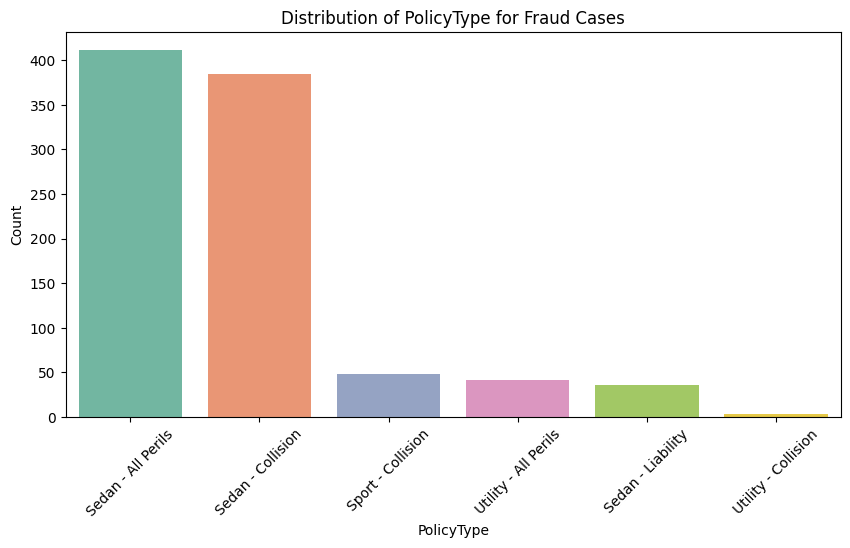

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


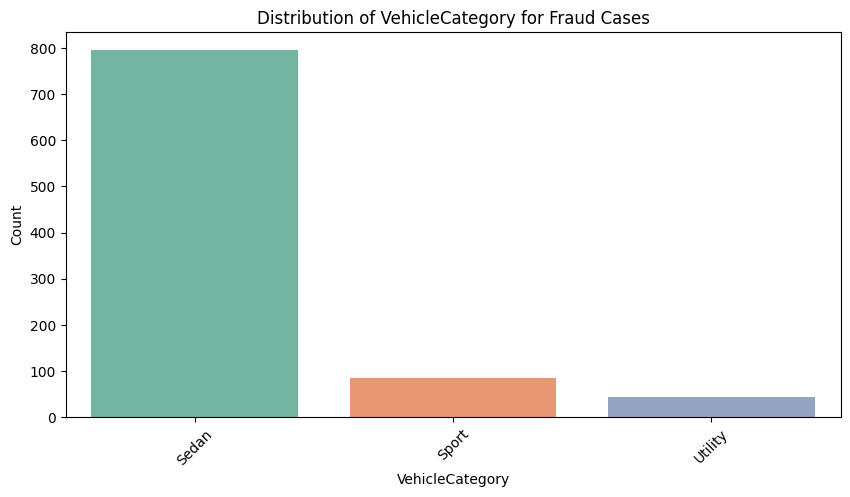

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


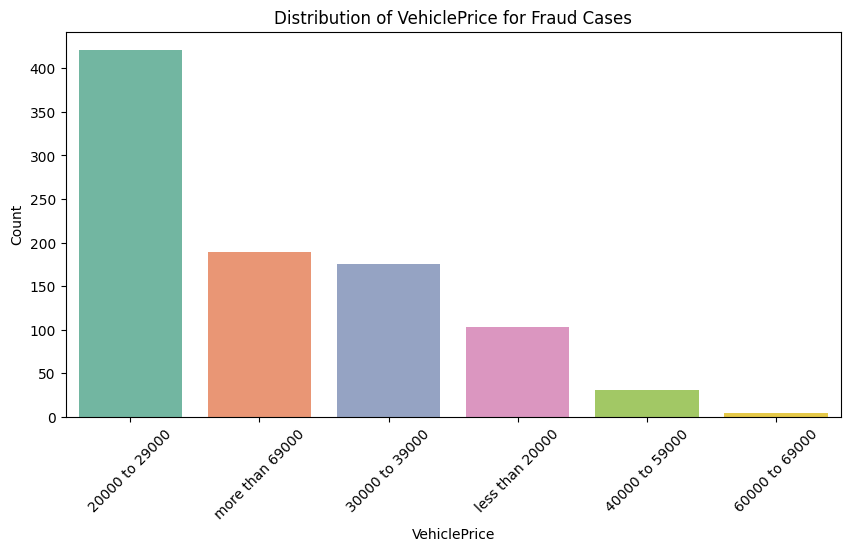

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


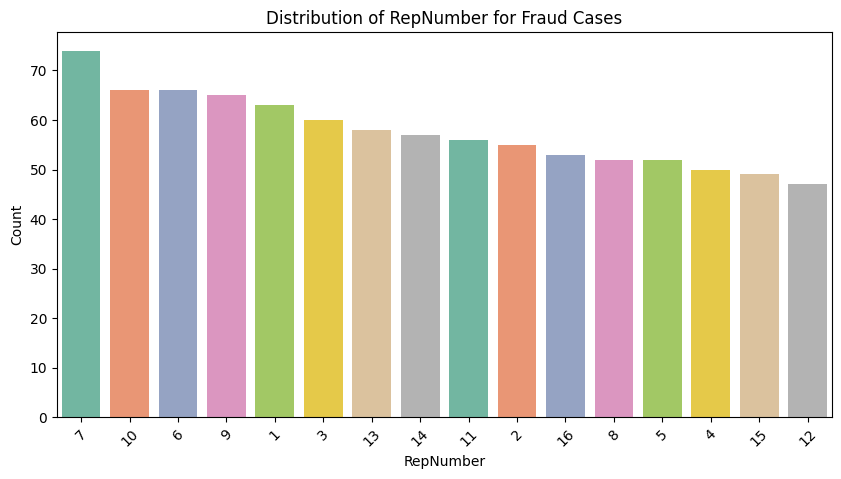

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


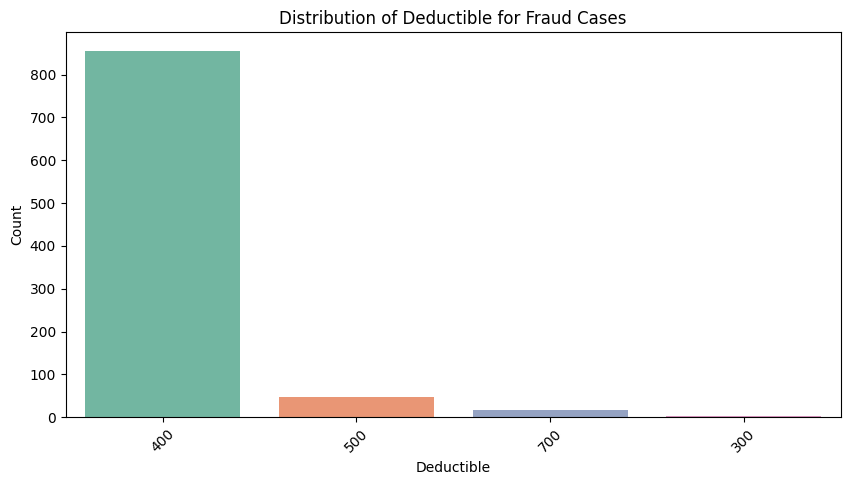

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


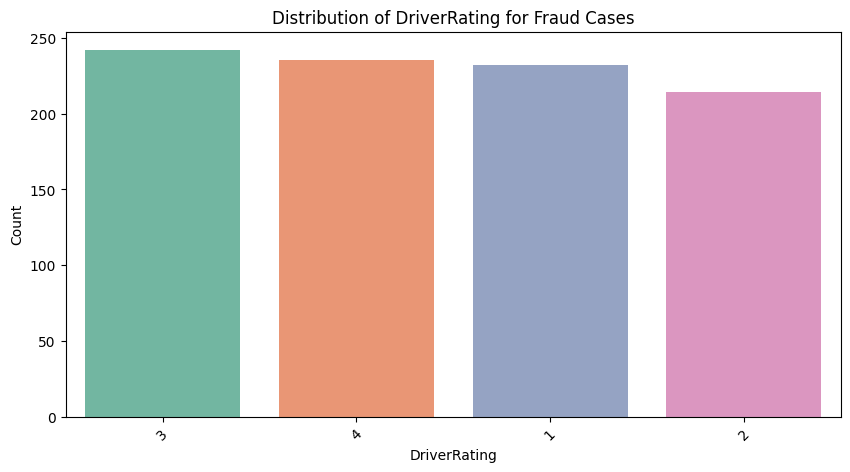

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


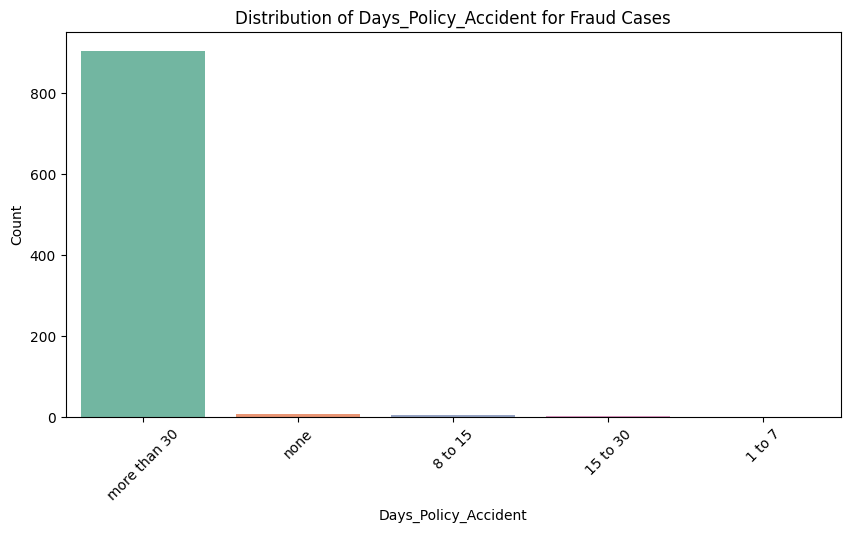

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


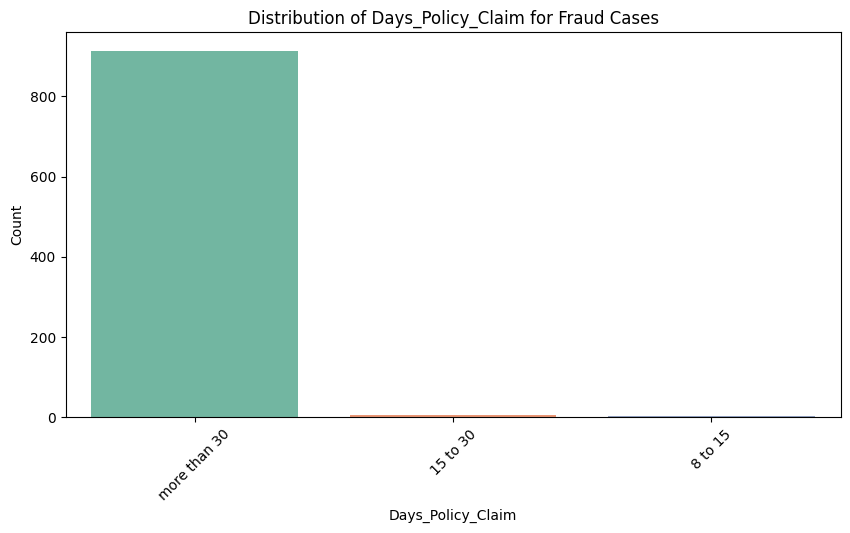

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


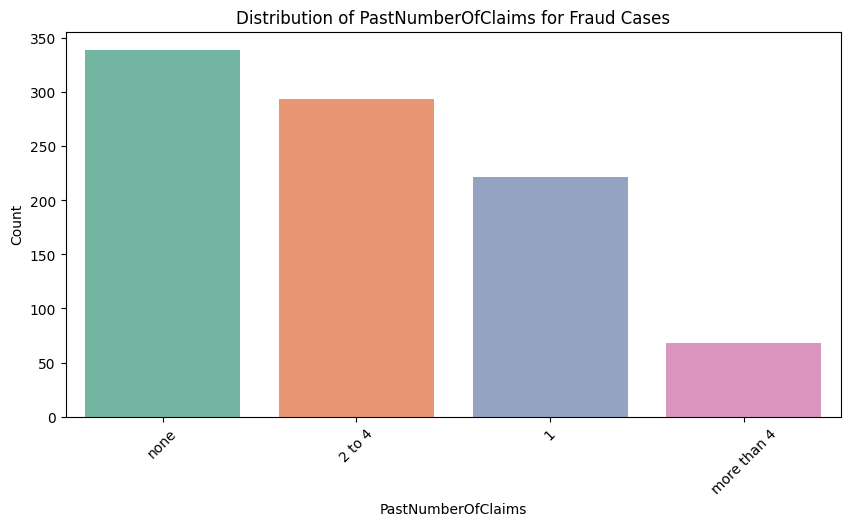

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


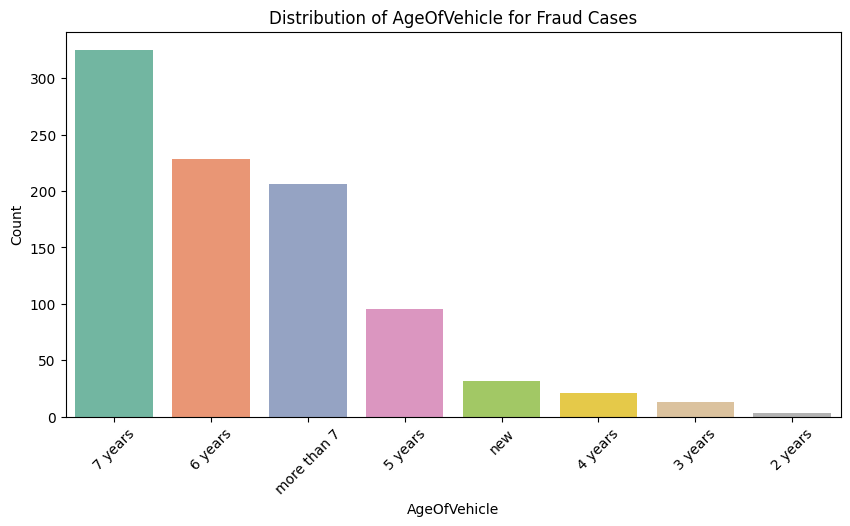

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


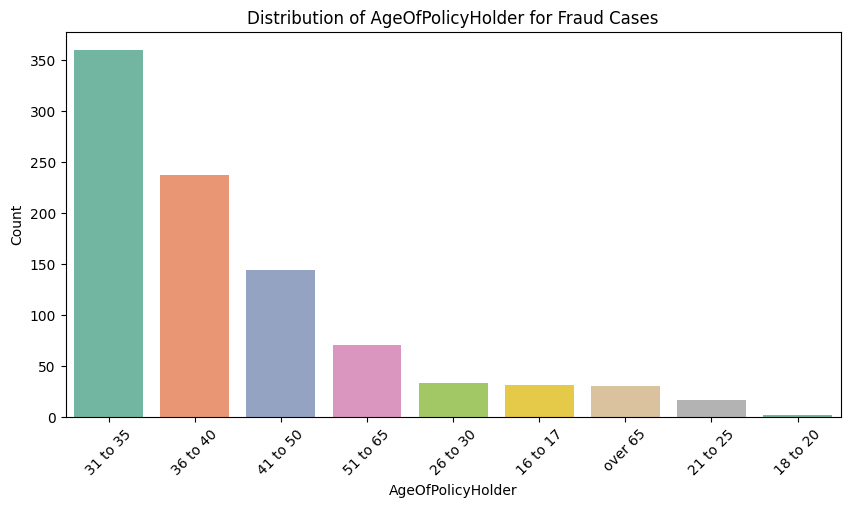

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


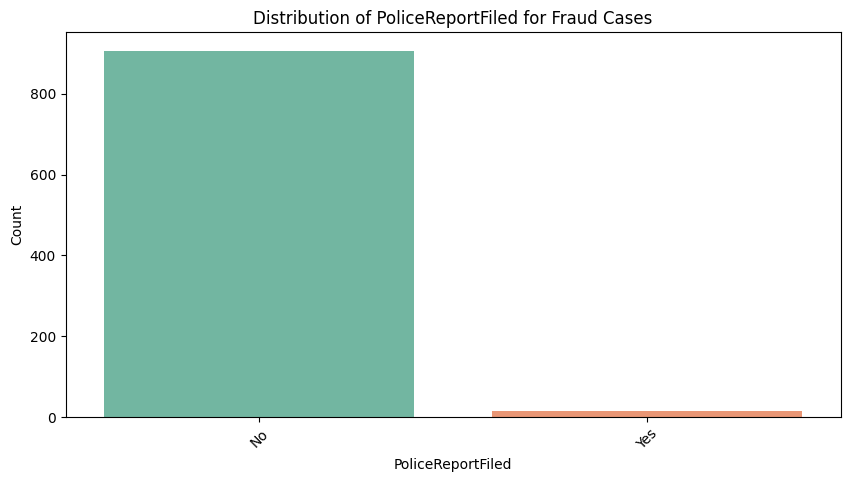

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


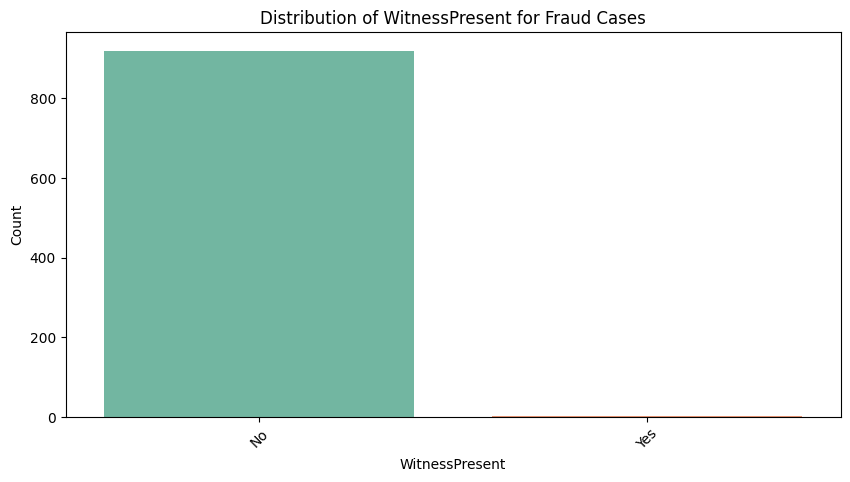

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


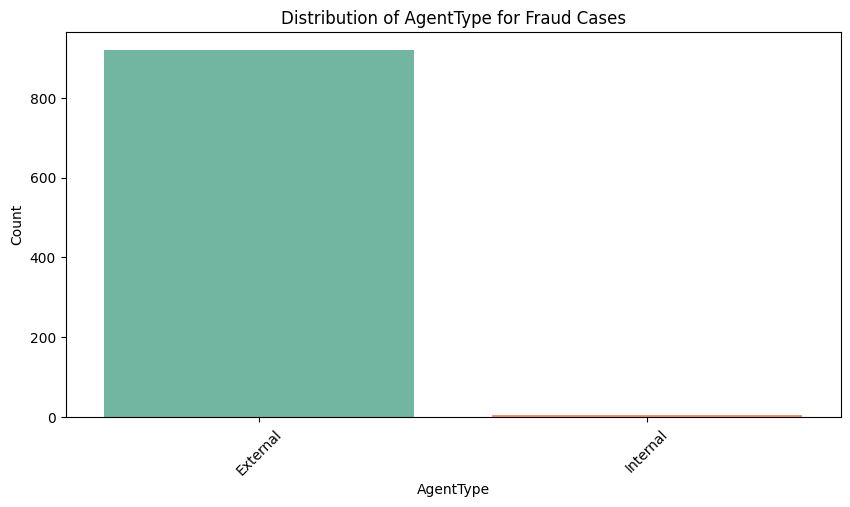

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


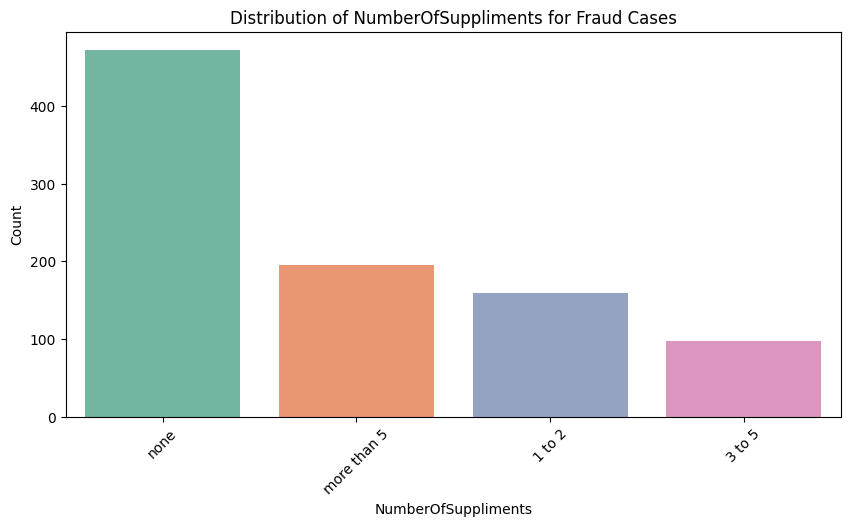

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


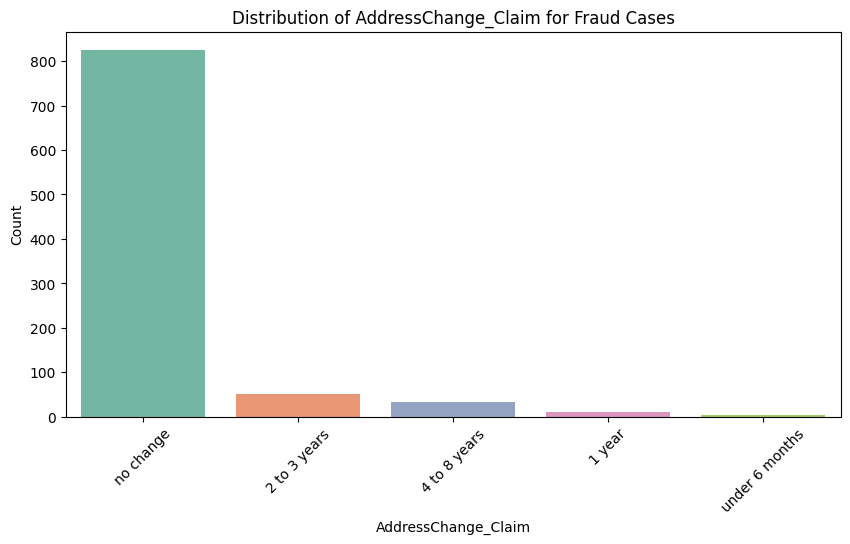

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


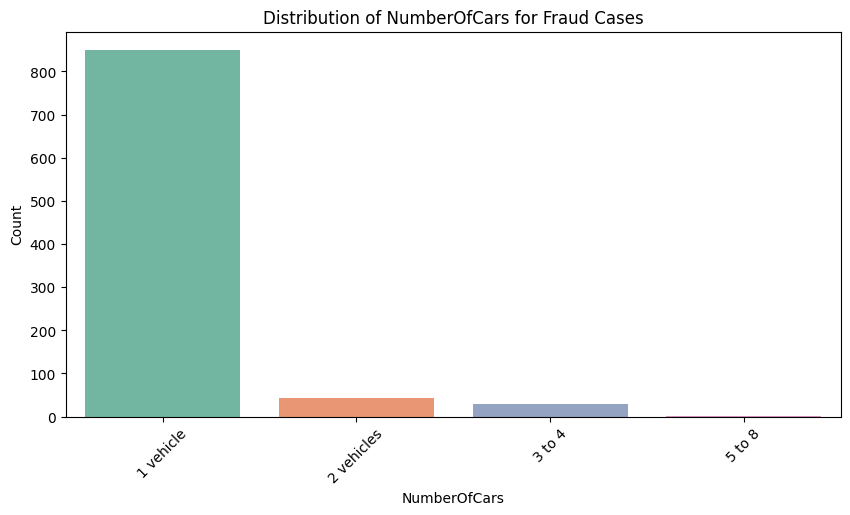

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


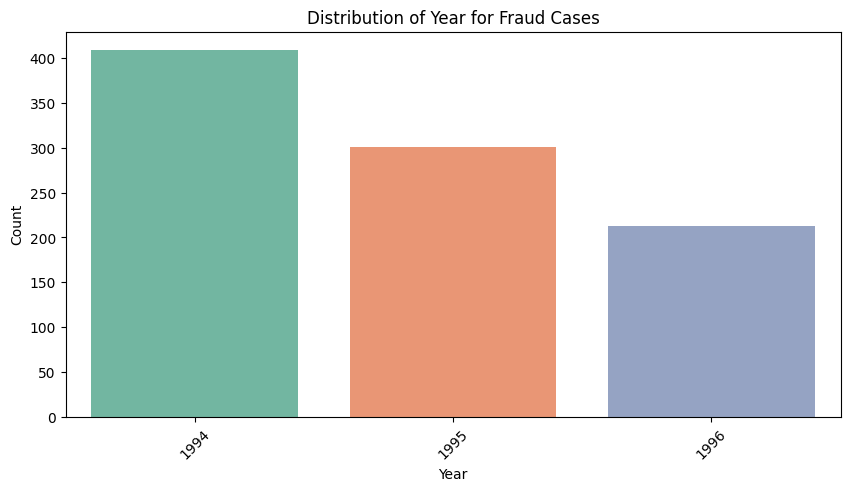

/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/45491054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')


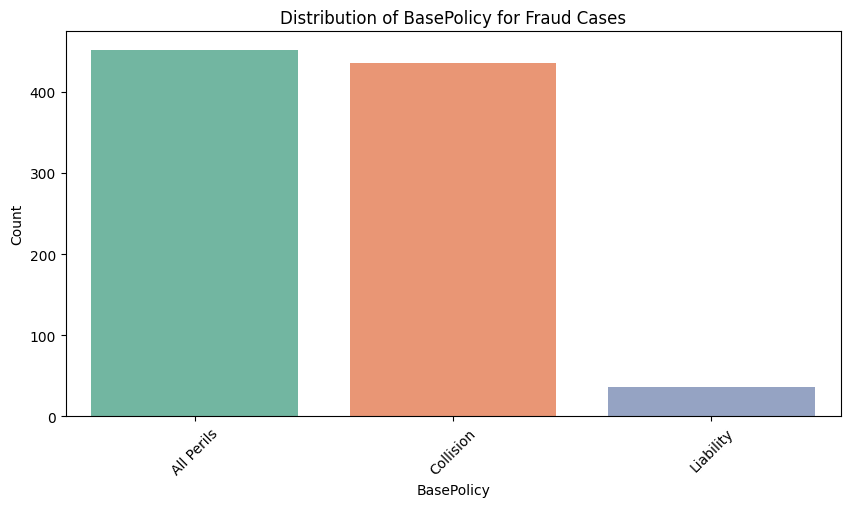

In [ ]:
# Analyze the distribution of categorical features for fraud cases
for feature in fraud_oracle_df.select_dtypes(include=['object']):
    if feature not in ['FraudFound_P']:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=feature, data=fraud_cases_df, order=fraud_cases_df[feature].value_counts().index, palette='Set2')
        plt.title(f"Distribution of {feature} for Fraud Cases")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


## Distribution of Fraud Cases for Numerical Features

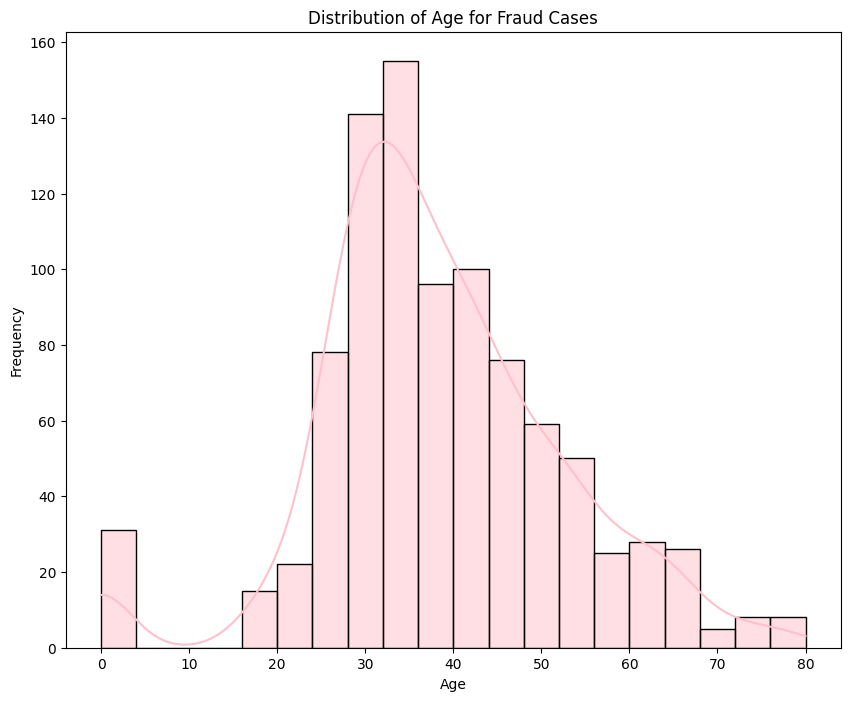

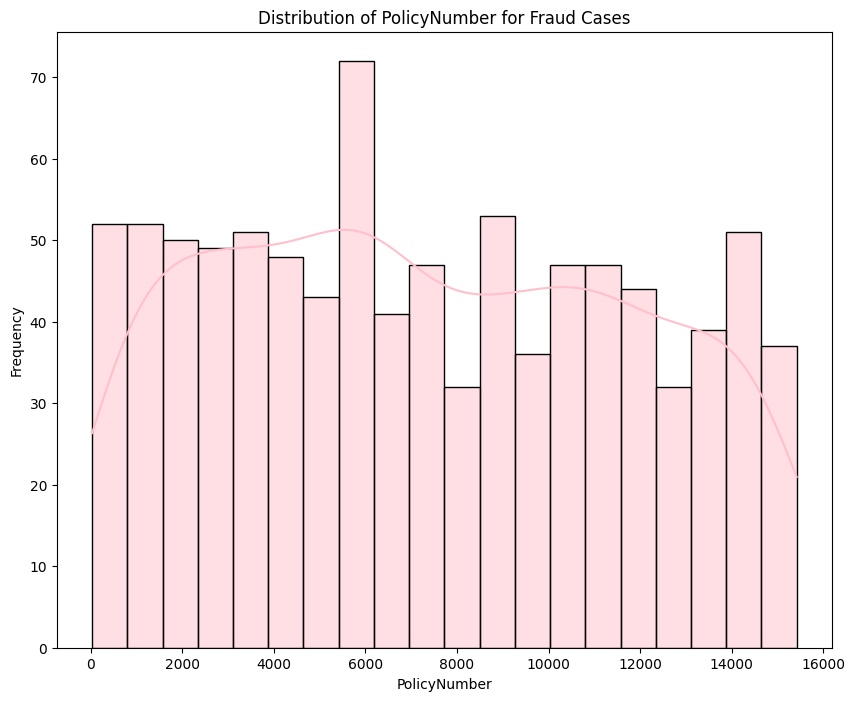

In [ ]:
# Plot histograms for numerical features to analyze their distribution in fraud cases
for feature in fraud_oracle_df.select_dtypes(include=['number']):
    plt.figure(figsize=(10, 8))
    sns.histplot(fraud_cases_df[feature], bins=20, kde=True, color='pink')
    plt.title(f"Distribution of {feature} for Fraud Cases")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

## Correlation Heatmap

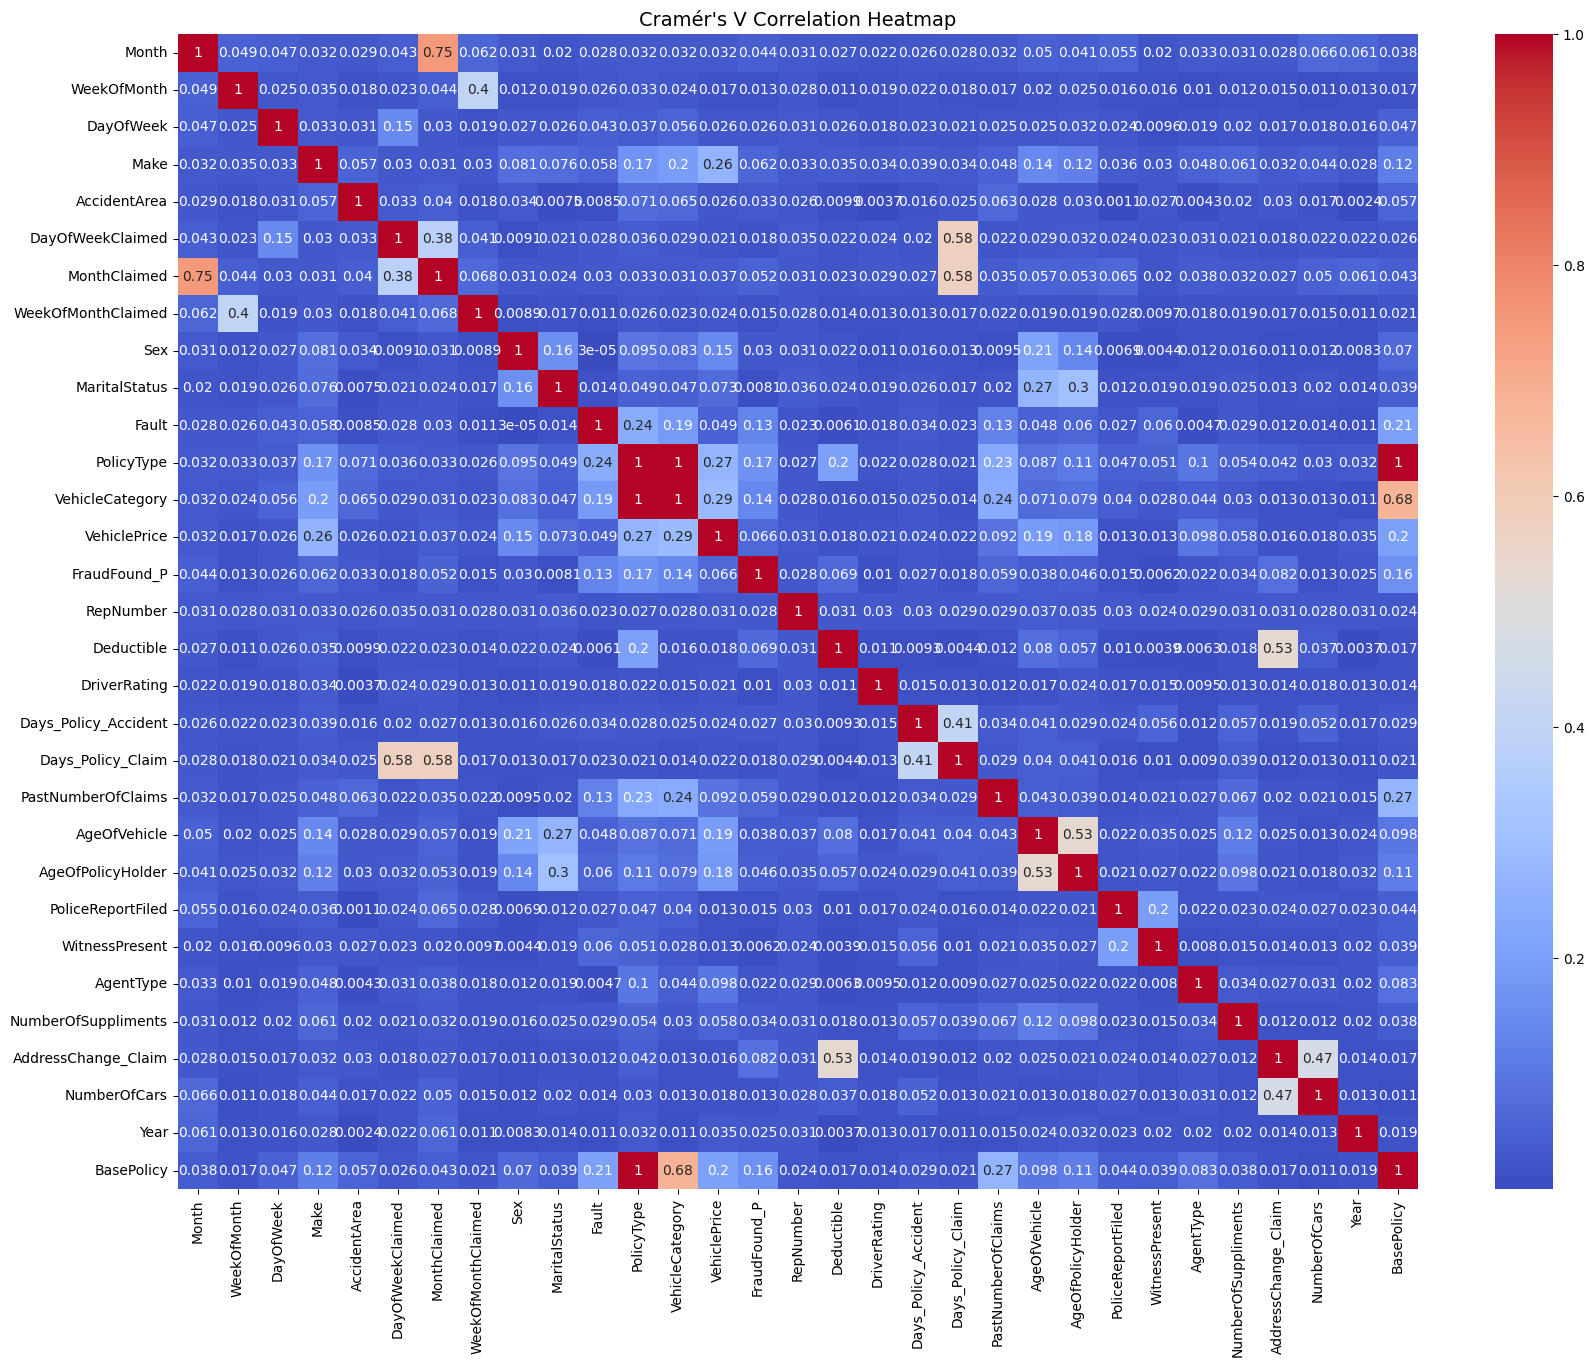

In [ ]:
# Select only categorical features for the correlation analysis: Cramér's V, the chi-squared statistic, or mutual information
# 0 (no association) to 1 (perfect association)

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Ensure this is a scalar
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Select categorical variables
categorical_vars = fraud_oracle_df.select_dtypes(include=['object']).columns

# Initialize the correlation matrix
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars, dtype=float)

# Compute pairwise Cramér's V
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 == var2:
            cramers_v_matrix.loc[var1, var2] = 1.0
        else:
            confusion_matrix = pd.crosstab(fraud_oracle_df[var1], fraud_oracle_df[var2])
            if not confusion_matrix.empty:
                value = cramers_v(confusion_matrix)
                cramers_v_matrix.loc[var1, var2] = float(value)

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Cramér's V Correlation Heatmap", fontsize=14)
plt.show()


# Data Preprocessing

## Dropping Useless/High Correlated Columns

In [ ]:
useless_columns = ['PolicyNumber', 'Age', 'Month', 'VehicleCategory', 'BasePolicy']

fraud_oracle_df = fraud_oracle_df.drop(columns=useless_columns, axis=1)

## Encoding Cateogorical Variables (Binary Variables)

In [ ]:
binary_columns = [col for col in fraud_oracle_df.columns if fraud_oracle_df[col].nunique() == 2 and col != 'FraudFound_P']
le = LabelEncoder()

for col in binary_columns:
    fraud_oracle_df[col] = le.fit_transform(fraud_oracle_df[col])
    print('Label Mapping: ', col, dict(zip(le.classes_, le.transform(le.classes_))))

fraud_oracle_df

Label Mapping:  AccidentArea {'Rural': 0, 'Urban': 1}
Label Mapping:  Sex {'Female': 0, 'Male': 1}
Label Mapping:  Fault {'Policy Holder': 0, 'Third Party': 1}
Label Mapping:  PoliceReportFiled {'No': 0, 'Yes': 1}
Label Mapping:  WitnessPresent {'No': 0, 'Yes': 1}
Label Mapping:  AgentType {'External': 0, 'Internal': 1}


,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
0,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,0,...,none,3 years,26 to 30,0,0,0,none,1 year,3 to 4,1994
1,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,0,...,none,6 years,31 to 35,1,0,0,none,no change,1 vehicle,1994
2,5,Friday,Honda,1,Thursday,Nov,2,1,Married,0,...,1,7 years,41 to 50,0,0,0,none,no change,1 vehicle,1994
3,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,1,...,1,more than 7,51 to 65,1,0,0,more than 5,no change,1 vehicle,1994
4,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,1,...,none,5 years,31 to 35,0,0,0,none,no change,1 vehicle,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,Friday,Toyota,1,Tuesday,Nov,5,1,Married,0,...,2 to 4,6 years,31 to 35,0,0,0,none,no change,1 vehicle,1996
15416,5,Thursday,Pontiac,1,Friday,Dec,1,1,Married,0,...,more than 4,6 years,31 to 35,0,0,0,more than 5,no change,3 to 4,1996
15417,5,Thursday,Toyota,0,Friday,Dec,1,1,Single,0,...,more than 4,5 years,26 to 30,0,0,0,1 to 2,no change,1 vehicle,1996
15418,1,Monday,Toyota,1,Thursday,Dec,2,0,Married,1,...,none,2 years,31 to 35,0,0,0,more than 5,no change,1 vehicle,1996


## Encoding Cateogircal Variables ( Ordinal & Nominal Categorical Variables)

In [ ]:
# Ordinal - Define logical mappings
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
                       'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

days_policy_mapping = {'none': 0, '1 to 7': 1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4}

past_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}

age_vehicle_mapping = {'new': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
                       '6 years': 6, '7 years': 7, 'more than 7': 8}

price_vehicle_mapping = {'less than 20000': 1, '20000 to 29000': 2, '30000 to 39000': 3,
                         '40000 to 59000': 4, '60000 to 69000': 5, 'more than 69000': 6}

age_policyholder_mapping = {'16 to 17': 1, '18 to 20': 2, '21 to 25': 3, '26 to 30': 4,
                            '31 to 35': 5, '36 to 40': 6, '41 to 50': 7, '51 to 65': 8, 'over 65': 9}

num_suppliments_mapping = {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3}

address_change_mapping = {'no change': 0, 'under 6 months': 1, '1 year': 2, '2 to 3 years': 3, '4 to 8 years': 4}

num_cars_mapping = {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3, '5 to 8': 4, 'more than 8': 5}

# Apply mappings
fraud_oracle_df['MonthClaimed'] = fraud_oracle_df['MonthClaimed'].map(month_mapping)
fraud_oracle_df['DayOfWeek'] = fraud_oracle_df['DayOfWeek'].map(day_of_week_mapping)
fraud_oracle_df['DayOfWeekClaimed'] = fraud_oracle_df['DayOfWeekClaimed'].map(day_of_week_mapping)
fraud_oracle_df['Days_Policy_Accident'] = fraud_oracle_df['Days_Policy_Accident'].map(days_policy_mapping)
fraud_oracle_df['Days_Policy_Claim'] = fraud_oracle_df['Days_Policy_Claim'].map(days_policy_mapping)
fraud_oracle_df['PastNumberOfClaims'] = fraud_oracle_df['PastNumberOfClaims'].map(past_claims_mapping)
fraud_oracle_df['AgeOfVehicle'] = fraud_oracle_df['AgeOfVehicle'].map(age_vehicle_mapping)
fraud_oracle_df['VehiclePrice'] = fraud_oracle_df['VehiclePrice'].map(price_vehicle_mapping)
fraud_oracle_df['AgeOfPolicyHolder'] = fraud_oracle_df['AgeOfPolicyHolder'].map(age_policyholder_mapping)
fraud_oracle_df['NumberOfSuppliments'] = fraud_oracle_df['NumberOfSuppliments'].map(num_suppliments_mapping)
fraud_oracle_df['AddressChange_Claim'] = fraud_oracle_df['AddressChange_Claim'].map(address_change_mapping)
fraud_oracle_df['NumberOfCars'] = fraud_oracle_df['NumberOfCars'].map(num_cars_mapping)

# Display transformed data
fraud_oracle_df


,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
0,5,3,Honda,1,2.0,1.0,1,0,Single,0,...,0,3,4,0,0,0,0,2,3,1994
1,3,3,Honda,1,1.0,1.0,4,1,Single,0,...,0,6,5,1,0,0,0,0,1,1994
2,5,5,Honda,1,4.0,11.0,2,1,Married,0,...,1,7,7,0,0,0,0,0,1,1994
3,2,6,Toyota,0,5.0,7.0,1,1,Married,1,...,1,8,8,1,0,0,3,0,1,1994
4,5,1,Honda,1,2.0,2.0,2,0,Single,1,...,0,5,5,0,0,0,0,0,1,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,Toyota,1,2.0,11.0,5,1,Married,0,...,2,6,5,0,0,0,0,0,1,1996
15416,5,4,Pontiac,1,5.0,12.0,1,1,Married,0,...,3,6,5,0,0,0,3,0,3,1996
15417,5,4,Toyota,0,5.0,12.0,1,1,Single,0,...,3,5,4,0,0,0,1,0,1,1996
15418,1,1,Toyota,1,4.0,12.0,2,0,Married,1,...,0,2,5,0,0,0,3,0,1,1996


In [ ]:
fraud_oracle_df = fraud_oracle_df.dropna()
fraud_oracle_df

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
0,5,3,Honda,1,2.0,1.0,1,0,Single,0,...,0,3,4,0,0,0,0,2,3,1994
1,3,3,Honda,1,1.0,1.0,4,1,Single,0,...,0,6,5,1,0,0,0,0,1,1994
2,5,5,Honda,1,4.0,11.0,2,1,Married,0,...,1,7,7,0,0,0,0,0,1,1994
3,2,6,Toyota,0,5.0,7.0,1,1,Married,1,...,1,8,8,1,0,0,3,0,1,1994
4,5,1,Honda,1,2.0,2.0,2,0,Single,1,...,0,5,5,0,0,0,0,0,1,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,Toyota,1,2.0,11.0,5,1,Married,0,...,2,6,5,0,0,0,0,0,1,1996
15416,5,4,Pontiac,1,5.0,12.0,1,1,Married,0,...,3,6,5,0,0,0,3,0,3,1996
15417,5,4,Toyota,0,5.0,12.0,1,1,Single,0,...,3,5,4,0,0,0,1,0,1,1996
15418,1,1,Toyota,1,4.0,12.0,2,0,Married,1,...,0,2,5,0,0,0,3,0,1,1996


In [ ]:
# Nominal - Label Encoding

encoding_columns = ['Make', 'MaritalStatus', 'PolicyType']
le = LabelEncoder()

for col in encoding_columns:
    fraud_oracle_df[col] = le.fit_transform(fraud_oracle_df[col])
    print('Label Mapping: ', col, dict(zip(le.classes_, le.transform(le.classes_))))

fraud_oracle_df

Label Mapping:  Make {'Accura': 0, 'BMW': 1, 'Chevrolet': 2, 'Dodge': 3, 'Ferrari': 4, 'Ford': 5, 'Honda': 6, 'Jaguar': 7, 'Lexus': 8, 'Mazda': 9, 'Mecedes': 10, 'Mercury': 11, 'Nisson': 12, 'Pontiac': 13, 'Porche': 14, 'Saab': 15, 'Saturn': 16, 'Toyota': 17, 'VW': 18}
Label Mapping:  MaritalStatus {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widow': 3}
Label Mapping:  PolicyType {'Sedan - All Perils': 0, 'Sedan - Collision': 1, 'Sedan - Liability': 2, 'Sport - All Perils': 3, 'Sport - Collision': 4, 'Sport - Liability': 5, 'Utility - All Perils': 6, 'Utility - Collision': 7, 'Utility - Liability': 8}


/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/472664161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_oracle_df[col] = le.fit_transform(fraud_oracle_df[col])
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/472664161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_oracle_df[col] = le.fit_transform(fraud_oracle_df[col])
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/472664161.py:7: SettingWithCopyWarning: 
A value is trying to be set on 

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
0,5,3,6,1,2.0,1.0,1,0,2,0,...,0,3,4,0,0,0,0,2,3,1994
1,3,3,6,1,1.0,1.0,4,1,2,0,...,0,6,5,1,0,0,0,0,1,1994
2,5,5,6,1,4.0,11.0,2,1,1,0,...,1,7,7,0,0,0,0,0,1,1994
3,2,6,17,0,5.0,7.0,1,1,1,1,...,1,8,8,1,0,0,3,0,1,1994
4,5,1,6,1,2.0,2.0,2,0,2,1,...,0,5,5,0,0,0,0,0,1,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,17,1,2.0,11.0,5,1,1,0,...,2,6,5,0,0,0,0,0,1,1996
15416,5,4,13,1,5.0,12.0,1,1,1,0,...,3,6,5,0,0,0,3,0,3,1996
15417,5,4,17,0,5.0,12.0,1,1,2,0,...,3,5,4,0,0,0,1,0,1,1996
15418,1,1,17,1,4.0,12.0,2,0,1,1,...,0,2,5,0,0,0,3,0,1,1996


In [ ]:
to_int_columns = ['WeekOfMonthClaimed', 'Deductible', 'FraudFound_P', 'WeekOfMonth', 'RepNumber', 'DriverRating', 'Year']

for col in to_int_columns:
    fraud_oracle_df[col] = fraud_oracle_df[col].astype('int')


/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/2340137094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_oracle_df[col] = fraud_oracle_df[col].astype('int')
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/2340137094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_oracle_df[col] = fraud_oracle_df[col].astype('int')
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/2340137094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

## Data Splitting

In [ ]:
# Split Features and Target Variable
X = fraud_oracle_df.drop('FraudFound_P', axis=1)  # Features
y = fraud_oracle_df['FraudFound_P']               # Target

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split the training set into a training and validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

## Feature Selection

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

# Initialize LASSO model
lasso = Lasso(alpha=0.01)  # Adjust alpha for more/less regularization
lasso.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance_lasso = pd.DataFrame({
    'Coefficient': lasso.coef_
}, index=X.columns)

# Filter features with non-zero coefficients
important_features_lasso = feature_importance_lasso[feature_importance_lasso['Coefficient'] != 0].sort_values(by='Coefficient')

print("Important Features:")
print(important_features_lasso)


Important Features:
                    Coefficient
Fault                 -0.022978
PastNumberOfClaims    -0.005288
PolicyType            -0.004833


<Figure size 1500x1000 with 0 Axes>

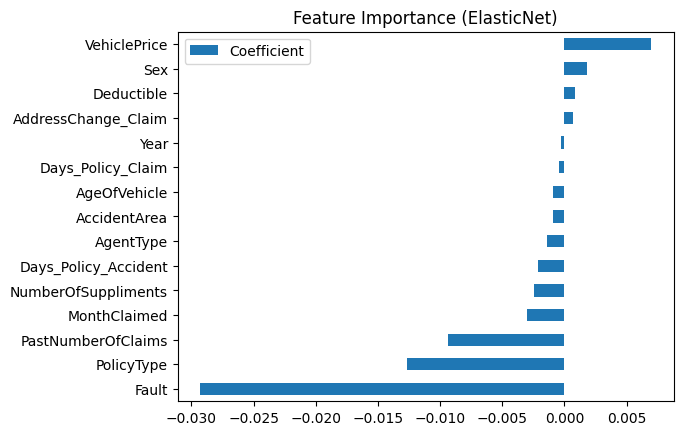

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model (a combination of LASSO and Ridge)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust l1_ratio for LASSO vs. Ridge trade-off
elastic_net.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance_en = pd.DataFrame({
    'Coefficient': elastic_net.coef_
}, index=X.columns)

# Filter features with non-zero coefficients
important_features_en = feature_importance_en[feature_importance_en['Coefficient'] != 0].sort_values(by='Coefficient')

plt.figure(figsize=(15, 10))
important_features_en.plot(kind='barh', title='Feature Importance (ElasticNet)')
plt.show()

In [ ]:
# Final Selected Set of Features: important_features_lasso.index.to_list(), important_features_en.index.to_list()
X_train = X_train[important_features_en.index.to_list()]
X_train_final = X_train_final[important_features_en.index.to_list()]
X_val = X_val[important_features_en.index.to_list()]
X_test = X_test[important_features_en.index.to_list()]

## Oversampling minority classes with SMOTE

In [ ]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train_final)

# Check the distribution of the target variable after SMOTE
balanced_class_distribution = y_train_balanced.value_counts(normalize=True)

# Display the balanced class distribution
balanced_class_distribution

FraudFound_P
0    0.5
1    0.5
Name: proportion, dtype: float64

# Feature Engineering

## Scaling

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Convert the scaled features back to a DataFrame using the columns from X_train_balanced
X_train_final_scaled_df = pd.DataFrame(X_train_final_scaled, columns=X_train_final.columns)
X_train_balanced_scaled_df = pd.DataFrame(X_train_balanced_scaled, columns=X_train_balanced.columns)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


# Model Building

## Logistic Regression

### Without using SMOTE

In [ ]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the Logistic Regression model on the original, unbalanced, and scaled training data
logistic_regression_model.fit(X_train_final_scaled, y_train_final)

# Make predictions on the validation set
y_val_pred_lr = logistic_regression_model.predict(X_val_scaled)
y_val_proba_lr = logistic_regression_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_lr)
precision = precision_score(y_val, y_val_pred_lr)
recall = recall_score(y_val, y_val_pred_lr)
f1 = f1_score(y_val, y_val_pred_lr)
auc = roc_auc_score(y_val, y_val_proba_lr)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_lr))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}


              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2030
           1       0.11      0.49      0.18       129

    accuracy                           0.74      2159
   macro avg       0.54      0.62      0.52      2159
weighted avg       0.91      0.74      0.81      2159



{'Accuracy': 0.7415470125057897,
 'Precision': 0.11351351351351352,
 'Recall': 0.4883720930232558,
 'F1 Score': 0.18421052631578946,
 'AUC': 0.7392045671516402}

### Using SMOTE

In [ ]:
# Initialize the Logistic Regression model
logistic_regression_model_balanced = LogisticRegression(random_state=42, class_weight='balanced')

# Train the Logistic Regression model on the balanced and scaled training data
logistic_regression_model_balanced.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the validation set
y_val_pred_lr_balanced = logistic_regression_model_balanced.predict(X_val_scaled)
y_val_proba_lr_balanced = logistic_regression_model_balanced.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_lr_balanced)
precision = precision_score(y_val, y_val_pred_lr_balanced)
recall = recall_score(y_val, y_val_pred_lr_balanced)
f1 = f1_score(y_val, y_val_pred_lr_balanced)
auc = roc_auc_score(y_val, y_val_proba_lr_balanced)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_lr_balanced))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}


              precision    recall  f1-score   support

           0       0.97      0.68      0.80      2030
           1       0.12      0.67      0.20       129

    accuracy                           0.68      2159
   macro avg       0.54      0.67      0.50      2159
weighted avg       0.92      0.68      0.76      2159



{'Accuracy': 0.6767021769337657,
 'Precision': 0.11605937921727395,
 'Recall': 0.6666666666666666,
 'F1 Score': 0.19770114942528735,
 'AUC': 0.7258047886355825}

### Hyperparameter tuning for ROC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the hyperparameter grid
param_grid = [
    {
        'penalty': ['l2', None],  # l2 or no penalty
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['lbfgs'],  # lbfgs solver
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['l1'],  # l1 penalty
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['liblinear', 'saga'],  # Solvers supporting l1
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],  # elasticnet penalty
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['saga'],  # Only saga supports elasticnet
        'l1_ratio': [0.5, 0.7, 0.9],  # ElasticNet mixing parameter
        'max_iter': [100, 500, 1000]
    }
]

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param_grid,
    scoring='recall',   # Use recall as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores for parallel processing
)

# Fit the model on the training data
grid_search.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best parameters and model
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred_lr = best_logistic_model.predict(X_val_scaled)
y_val_proba_lr = best_logistic_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_lr)
precision = precision_score(y_val, y_val_pred_lr)
recall = recall_score(y_val, y_val_pred_lr)
f1 = f1_score(y_val, y_val_pred_lr)
auc = roc_auc_score(y_val, y_val_proba_lr)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)


Fitting 5 folds for each of 105 candidates, totalling 525 fits


/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kejiayi/Library/Python/3.9/lib/py

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Evaluation Metrics: {'Accuracy': 0.6632700324224178, 'Precision': 0.10966057441253264, 'Recall': 0.6511627906976745, 'F1 Score': 0.1877094972067039, 'AUC': 0.7266639935846031}


/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Make predictions on the test set using the best model
y_test_pred_lr = best_logistic_model.predict(X_test_scaled)
y_test_proba_lr = best_logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_lr)
precision = precision_score(y_test, y_test_pred_lr)
recall = recall_score(y_test, y_test_pred_lr)
f1 = f1_score(y_test, y_test_pred_lr)
auc = roc_auc_score(y_test, y_test_proba_lr)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)

Evaluation Metrics: {'Accuracy': 0.6502377864245569, 'Precision': 0.10442477876106195, 'Recall': 0.6389891696750902, 'F1 Score': 0.1795131845841785, 'AUC': 0.7096419526294687}


## Random Forest

### Without using SMOTE

In [ ]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the Random Forest model on the original, unbalanced, and scaled training data
random_forest_model.fit(X_train_final_scaled, y_train_final)

# Make predictions on the validation set
y_val_pred_rf = random_forest_model.predict(X_val_scaled)
y_val_proba_rf = random_forest_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_rf)
precision = precision_score(y_val, y_val_pred_rf)
recall = recall_score(y_val, y_val_pred_rf)
f1 = f1_score(y_val, y_val_pred_rf)
auc = roc_auc_score(y_val, y_val_proba_rf)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_rf))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2030
           1       0.29      0.09      0.13       129

    accuracy                           0.93      2159
   macro avg       0.62      0.54      0.55      2159
weighted avg       0.91      0.93      0.92      2159



{'Accuracy': 0.9328392774432608,
 'Precision': 0.2894736842105263,
 'Recall': 0.08527131782945736,
 'F1 Score': 0.1317365269461078,
 'AUC': 0.7915129644480086}

### Using SMOTE

In [ ]:
# Initialize the Random Forest model
random_forest_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the Random Forest model on the balanced, scaled training data
random_forest_model_balanced.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the validation set
y_val_pred_rf_balanced = random_forest_model_balanced.predict(X_val_scaled)
y_val_proba_rf_balanced = random_forest_model_balanced.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_rf_balanced)
precision = precision_score(y_val, y_val_pred_rf_balanced)
recall = recall_score(y_val, y_val_pred_rf_balanced)
f1 = f1_score(y_val, y_val_pred_rf_balanced)
auc = roc_auc_score(y_val, y_val_proba_rf_balanced)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_rf_balanced))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2030
           1       0.25      0.32      0.28       129

    accuracy                           0.90      2159
   macro avg       0.60      0.63      0.61      2159
weighted avg       0.91      0.90      0.91      2159



{'Accuracy': 0.9022695692450209,
 'Precision': 0.25,
 'Recall': 0.3178294573643411,
 'F1 Score': 0.27986348122866894,
 'AUC': 0.7944858135716195}

### Hyperparameter Tuning for ROC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],         # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum tree depth
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],            # Number of features considered for splitting
    'bootstrap': [True, False],                        # Whether to bootstrap samples
}

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=50,          # Number of parameter settings to try
    scoring='recall',   # Optimize for recall
    cv=5,               # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1           # Use all available cores
)

# Fit the random search on the training data
random_search.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best parameters and model
best_params = random_search.best_params_
best_random_forest_model = random_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred_rf = best_random_forest_model.predict(X_val_scaled)
y_val_proba_rf = best_random_forest_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_rf)
precision = precision_score(y_val, y_val_pred_rf)
recall = recall_score(y_val, y_val_pred_rf)
f1 = f1_score(y_val, y_val_pred_rf)
auc = roc_auc_score(y_val, y_val_proba_rf)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Evaluation Metrics: {'Accuracy': 0.8911533117183882, 'Precision': 0.22395833333333334, 'Recall': 0.3333333333333333, 'F1 Score': 0.26791277258566976, 'AUC': 0.8174170389888112}


In [ ]:
# Make predictions on the test set using the best model
y_test_pred_rf = best_random_forest_model.predict(X_test_scaled)
y_test_proba_rf = best_random_forest_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_rf)
precision = precision_score(y_test, y_test_pred_rf)
recall = recall_score(y_test, y_test_pred_rf)
f1 = f1_score(y_test, y_test_pred_rf)
auc = roc_auc_score(y_test, y_test_proba_rf)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)


Evaluation Metrics: {'Accuracy': 0.88694336359706, 'Precision': 0.2099056603773585, 'Recall': 0.3212996389891697, 'F1 Score': 0.25392296718972895, 'AUC': 0.8139984875563742}


## XGBoost

### Without using SMOTE

In [ ]:
# Initialize the XGBoost model
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the original, unbalanced, and scaled training data
xgboost_model.fit(X_train_final_scaled, y_train_final)

# Make predictions on the validation set
y_val_pred_xgb = xgboost_model.predict(X_val_scaled)
y_val_proba_xgb = xgboost_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_xgb)
precision = precision_score(y_val, y_val_pred_xgb)
recall = recall_score(y_val, y_val_pred_xgb)
f1 = f1_score(y_val, y_val_pred_xgb)
auc = roc_auc_score(y_val, y_val_proba_xgb)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_xgb))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2030
           1       0.21      0.04      0.07       129

    accuracy                           0.93      2159
   macro avg       0.58      0.51      0.52      2159
weighted avg       0.90      0.93      0.91      2159



/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:07:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Accuracy': 0.9337656322371468,
 'Precision': 0.20833333333333334,
 'Recall': 0.03875968992248062,
 'F1 Score': 0.06535947712418301,
 'AUC': 0.8181311337686636}

### Using SMOTE

In [ ]:
# Initialize the XGBoost model
xgboost_model_balanced = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the balanced, scaled training data
xgboost_model_balanced.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the validation set
y_val_pred_xgb_balanced = xgboost_model_balanced.predict(X_val_scaled)
y_val_proba_xgb_balanced = xgboost_model_balanced.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_xgb_balanced)
precision = precision_score(y_val, y_val_pred_xgb_balanced)
recall = recall_score(y_val, y_val_pred_xgb_balanced)
f1 = f1_score(y_val, y_val_pred_xgb_balanced)
auc = roc_auc_score(y_val, y_val_proba_xgb_balanced)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_xgb_balanced))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:07:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2030
           1       0.23      0.35      0.28       129

    accuracy                           0.89      2159
   macro avg       0.59      0.64      0.61      2159
weighted avg       0.91      0.89      0.90      2159



{'Accuracy': 0.890226956924502,
 'Precision': 0.22727272727272727,
 'Recall': 0.3488372093023256,
 'F1 Score': 0.27522935779816515,
 'AUC': 0.8261217397945546}

### Hyperparameter tuning for ROC

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], # Number of trees
    'max_depth': [3, 5, 7, 9, 11],             # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],    # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used per tree
    'gamma': [0, 1, 5, 10],                    # Minimum loss reduction for a split
    'reg_alpha': [0, 0.1, 1, 10],              # L1 regularization term on weights
    'reg_lambda': [1, 10, 100],                # L2 regularization term on weights
    'min_child_weight': [1, 3, 5, 7]           # Minimum sum of instance weight for a split
}

# Initialize the XGBoost model
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to try
    scoring='recall',  # Optimize for recall
    cv=5,               # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1           # Use all available cores
)

# Fit the random search on the training data
random_search.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best parameters and model
best_params = random_search.best_params_
best_xgboost_model = random_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred_xgb = best_xgboost_model.predict(X_val_scaled)
y_val_proba_xgb = best_xgboost_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_xgb)
precision = precision_score(y_val, y_val_pred_xgb)
recall = recall_score(y_val, y_val_pred_xgb)
f1 = f1_score(y_val, y_val_pred_xgb)
auc = roc_auc_score(y_val, y_val_proba_xgb)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

Best Parameters: {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Evaluation Metrics: {'Accuracy': 0.8981009726725335, 'Precision': 0.2275449101796407, 'Recall': 0.29457364341085274, 'F1 Score': 0.25675675675675674, 'AUC': 0.8194543093901555}


In [ ]:
# Make predictions on the test set using the best model
y_test_pred_xgb = best_xgboost_model.predict(X_test_scaled)
y_test_proba_xgb = best_xgboost_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_xgb)
precision = precision_score(y_test, y_test_pred_xgb)
recall = recall_score(y_test, y_test_pred_xgb)
f1 = f1_score(y_test, y_test_pred_xgb)
auc = roc_auc_score(y_test, y_test_proba_xgb)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)

Evaluation Metrics: {'Accuracy': 0.8878080415045395, 'Precision': 0.2119047619047619, 'Recall': 0.3212996389891697, 'F1 Score': 0.25538020086083213, 'AUC': 0.8258510815798146}


## CatBoost

### Without using SMOTE

In [ ]:
# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced')

# Train the CatBoost model on the original, unbalanced, and scaled training data
catboost_model.fit(X_train_final_scaled, y_train_final)

# Make predictions on the validation set
y_val_pred_cat = catboost_model.predict(X_val_scaled)
y_val_proba_cat = catboost_model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_cat)
precision = precision_score(y_val, y_val_pred_cat)
recall = recall_score(y_val, y_val_pred_cat)
f1 = f1_score(y_val, y_val_pred_cat)
auc = roc_auc_score(y_val, y_val_proba_cat)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_cat))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2030
           1       0.20      0.60      0.30       129

    accuracy                           0.83      2159
   macro avg       0.58      0.72      0.60      2159
weighted avg       0.92      0.83      0.87      2159



{'Accuracy': 0.8290875405280222,
 'Precision': 0.19696969696969696,
 'Recall': 0.6046511627906976,
 'F1 Score': 0.29714285714285715,
 'AUC': 0.8398957497995189}

### Using SMOTE

In [ ]:
# Initialize the CatBoost model
catboost_model_balanced = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced')

# Train the CatBoost model on the balanced, scaled training data
catboost_model_balanced.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the validation set
y_val_pred_cat_balanced = catboost_model_balanced.predict(X_val_scaled)
y_val_proba_cat_balanced = catboost_model_balanced.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_cat_balanced)
precision = precision_score(y_val, y_val_pred_cat_balanced)
recall = recall_score(y_val, y_val_pred_cat_balanced)
f1 = f1_score(y_val, y_val_pred_cat_balanced)
auc = roc_auc_score(y_val, y_val_proba_cat_balanced)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_cat_balanced))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2030
           1       0.22      0.34      0.27       129

    accuracy                           0.89      2159
   macro avg       0.59      0.63      0.60      2159
weighted avg       0.91      0.89      0.90      2159



{'Accuracy': 0.887447892542844,
 'Precision': 0.21782178217821782,
 'Recall': 0.34108527131782945,
 'F1 Score': 0.26586102719033233,
 'AUC': 0.828611524802383}

### Hyperparameter tuning for ROC

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000, step=100),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_uniform("random_strength", 0, 1),
        "bagging_temperature": trial.suggest_uniform("bagging_temperature", 0, 1),
    }

    # Initialize the CatBoost model with the current set of parameters
    model = CatBoostClassifier(
        random_state=42,
        verbose=0,
        **params
    )

    # Train the model on the training data
    model.fit(X_train_balanced_scaled, y_train_balanced)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_scaled)
    y_val_proba = model.predict_proba(X_val_scaled)[:, 1]  # Probability for the positive class

    # Evaluate model performance
    # Using recall as the metric for optimization
    recall = recall_score(y_val, y_val_pred)

    return recall

# Create a study object
study = optuna.create_study(direction="maximize")

# Run the optimization
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final CatBoost model with the best parameters
best_catboost_model = CatBoostClassifier(
    random_state=42,
    verbose=0,
    **best_params
)
best_catboost_model.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the validation set
y_val_pred_best = best_catboost_model.predict(X_val_scaled)
y_val_proba_best = best_catboost_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_val, y_val_pred_best)
precision = precision_score(y_val, y_val_pred_best)
recall = recall_score(y_val, y_val_pred_best)
f1 = f1_score(y_val, y_val_pred_best)
auc = roc_auc_score(y_val, y_val_proba_best)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)


[I 2024-11-23 13:04:14,525] A new study created in memory with name: no-name-f6b3c3c8-46cf-448a-b026-09e565ffe36b
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/623492328.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/623492328.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),
/var/folders/w7/vb_x50hj0vdg_c9lhl4tnp000000gn/T/ipykernel_2526/623492328.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed i

Best Parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.01470476106300087, 'l2_leaf_reg': 0.07398495101931231, 'border_count': 255, 'random_strength': 0.16267339770454867, 'bagging_temperature': 0.019902523905031937}
Evaluation Metrics: {'Accuracy': 0.7072718851320056, 'Precision': 0.1370851370851371, 'Recall': 0.7364341085271318, 'F1 Score': 0.23114355231143552, 'AUC': 0.8059609730018712}


In [ ]:
# Make predictions on the test set
y_test_pred_best = best_catboost_model.predict(X_test_scaled)
y_test_proba_best = best_catboost_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_test_pred_best)
precision = precision_score(y_test, y_test_pred_best)
recall = recall_score(y_test, y_test_pred_best)
f1 = f1_score(y_test, y_test_pred_best)
auc = roc_auc_score(y_test, y_test_proba_best)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print("Evaluation Metrics:", evaluation_metrics)

Evaluation Metrics: {'Accuracy': 0.7105490704712495, 'Precision': 0.14647137150466044, 'Recall': 0.7942238267148014, 'F1 Score': 0.2473299606520517, 'AUC': 0.8255767332711865}


## Neural Network

### Without using SMOTE

In [ ]:
# Define the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_final_scaled.shape[1]),  # Input layer
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

# Train the model on the original, unbalanced, and scaled training data
history = nn_model.fit(
    X_train_final_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Make predictions on the validation set
y_val_proba_nn = nn_model.predict(X_val_scaled).flatten()  # Probability for the positive class
y_val_pred_nn = (y_val_proba_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_nn)
precision = precision_score(y_val, y_val_pred_nn)
recall = recall_score(y_val, y_val_pred_nn)
f1 = f1_score(y_val, y_val_pred_nn)
auc = roc_auc_score(y_val, y_val_proba_nn)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_nn))
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print(evaluation_metrics)


Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 0.3307 - recall: 0.0430 - val_loss: 0.2080 - val_recall: 0.0000e+00
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.2307 - recall: 0.0026 - val_loss: 0.2052 - val_recall: 0.0000e+00
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.2083 - recall: 7.0802e-04 - val_loss: 0.2069 - val_recall: 0.0000e+00
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.2005 - recall: 0.0000e+00 - val_loss: 0.2043 - val_recall: 0.0000e+00
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.2025 - recall: 0.0083 - val_loss: 0.2046 - val_recall: 0.0000e+00
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.1935 - recall: 0.0000e+00 - val_loss: 0.2047 - val_recall: 0.0000e+00
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.1988 - recall: 0.0000e+00 - val_loss: 0.2078 - val_recall: 0.0000e+00
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.1907 - rec

/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Using SMOTE

In [ ]:
# Define the Neural Network model
nn_model_balanced = Sequential([
    Dense(64, activation='relu', input_dim=X_train_balanced_scaled.shape[1]),  # Input layer
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
nn_model_balanced.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

# Train the model on the balanced training data
history = nn_model_balanced.fit(
    X_train_balanced_scaled, y_train_balanced,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Make predictions on the validation set
y_val_proba_nn = nn_model_balanced.predict(X_val_scaled).flatten()  # Probability for the positive class
y_val_pred_nn = (y_val_proba_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_nn)
precision = precision_score(y_val, y_val_pred_nn)
recall = recall_score(y_val, y_val_pred_nn)
f1 = f1_score(y_val, y_val_pred_nn)
auc = roc_auc_score(y_val, y_val_proba_nn)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_nn))
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print(evaluation_metrics)

Epoch 1/50


/Users/kejiayi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 0.5935 - recall: 0.7212 - val_loss: 0.4491 - val_recall: 0.5736
Epoch 2/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.4581 - recall: 0.8359 - val_loss: 0.4404 - val_recall: 0.5969
Epoch 3/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.4255 - recall: 0.8629 - val_loss: 0.4236 - val_recall: 0.5736
Epoch 4/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.4164 - recall: 0.8751 - val_loss: 0.3901 - val_recall: 0.5581
Epoch 5/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.4039 - recall: 0.8922 - val_loss: 0.4352 - val_recall: 0.6202
Epoch 6/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.3978 - recall: 0.8935 - val_loss: 0.3938 - val_recall: 0.5891
Epoch 7/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3829 - recall: 0.9064 - val_loss: 0.4000 - val_recall: 0.6047
Epoch 8/50
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.3876 - recall: 0.9078 - val_loss: 0.3762 - val_recall: 0.5659
Epo

In [ ]:
# Make predictions on the test set
y_test_proba_nn = nn_model_balanced.predict(X_test_scaled).flatten()  # Probability for the positive class
y_test_pred_nn = (y_test_proba_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_nn)
precision = precision_score(y_test, y_test_pred_nn)
recall = recall_score(y_test, y_test_pred_nn)
f1 = f1_score(y_test, y_test_pred_nn)
auc = roc_auc_score(y_test, y_test_proba_nn)

# Display the evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
}

print(evaluation_metrics)

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
{'Accuracy': 0.7926934716817985, 'Precision': 0.1727447216890595, 'Recall': 0.6498194945848376, 'F1 Score': 0.27293404094010615, 'AUC': 0.8227489949554776}


## KNN

### Without using SMOTE

In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model on the original, unbalanced, and scaled training data
knn_model.fit(X_train_final_scaled, y_train_final)

# Make predictions on the validation set
y_val_pred_knn = knn_model.predict(X_val_scaled)
y_val_proba_knn = knn_model.predict_proba(X_val_scaled)[:, 1] # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_knn)
precision = precision_score(y_val, y_val_pred_knn)
recall = recall_score(y_val, y_val_pred_knn)
f1 = f1_score(y_val, y_val_pred_knn)
auc = roc_auc_score(y_val, y_val_proba_knn)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_knn))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc
}

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2030
           1       0.48      0.08      0.13       129

    accuracy                           0.94      2159
   macro avg       0.71      0.54      0.55      2159
weighted avg       0.92      0.94      0.92      2159



{'Accuracy': 0.9397869383974062,
 'Precision': 0.47619047619047616,
 'Recall': 0.07751937984496124,
 'F1 Score': 0.13333333333333333,
 'AUC': 0.6402432504677893}

### Using SMOTE

In [ ]:
# Initialize the KNN model
knn_model_balanced = KNeighborsClassifier()

# Train the KNN model on the balanced training data
knn_model_balanced.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the validation set
y_val_pred_knn_balanced = knn_model_balanced.predict(X_val_scaled)
y_val_proba_knn_balanced = knn_model_balanced.predict_proba(X_val_scaled)[:, 1] # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred_knn_balanced)
precision = precision_score(y_val, y_val_pred_knn_balanced)
recall = recall_score(y_val, y_val_pred_knn_balanced)
f1 = f1_score(y_val, y_val_pred_knn_balanced)
auc = roc_auc_score(y_val, y_val_proba_knn_balanced)

# Display the evaluation metrics
print(classification_report(y_val, y_val_pred_knn_balanced))
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc
}

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2030
           1       0.14      0.43      0.21       129

    accuracy                           0.81      2159
   macro avg       0.55      0.63      0.55      2159
weighted avg       0.91      0.81      0.85      2159



{'Accuracy': 0.8091709124594719,
 'Precision': 0.14177215189873418,
 'Recall': 0.43410852713178294,
 'F1 Score': 0.21374045801526717,
 'AUC': 0.6954252109825485}

### Hyperparameter tuning for ROC

In [ ]:
# Define the Parameter grid
param_distributions = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Set up RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_distributions,
                                        n_iter=10, scoring='recall', cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model to the scaled training data
random_search_knn.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best parameters and retrain the model
best_params = random_search_knn.best_params_
knn_best_model = random_search_knn.best_estimator_

print(f"Best Parameters: {best_params}")

# Predict on the validation set
y_val_pred_knn_tuned = knn_best_model.predict(X_val_scaled)
y_val_proba_knn_tuned = knn_best_model.predict_proba(X_val_scaled)[:, 1]

# Calculate evaluation metrics
accuracy_tuned = accuracy_score(y_val, y_val_pred_knn_tuned)
precision_tuned = precision_score(y_val, y_val_pred_knn_tuned)
recall_tuned = recall_score(y_val, y_val_pred_knn_tuned)
f1_tuned = f1_score(y_val, y_val_pred_knn_tuned)
auc_tuned = roc_auc_score(y_val, y_val_proba_knn_tuned)

# Display the evaluation metrics
{
    "Accuracy": accuracy_tuned,
    "Precision": precision_tuned,
    "Recall": recall_tuned,
    "F1 Score": f1_tuned,
    "AUC": auc_tuned
}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=   0.4s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=   0.5s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=   0.5s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=   0.5s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=   0.6s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=   0.6s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=   0.7s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=   0.8s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=   0.6s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=   0.6s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=   0.5s
[CV] END ................n_neighbors=7, p=1, wei

{'Accuracy': 0.7915701713756369,
 'Precision': 0.1503267973856209,
 'Recall': 0.5348837209302325,
 'F1 Score': 0.23469387755102042,
 'AUC': 0.7504334211631725}

In [ ]:
# Predict on the test set
y_test_pred_knn_tuned = knn_best_model.predict(X_test_scaled)
y_test_proba_knn_tuned = knn_best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy_tuned = accuracy_score(y_test, y_test_pred_knn_tuned)
precision_tuned = precision_score(y_test, y_test_pred_knn_tuned)
recall_tuned = recall_score(y_test, y_test_pred_knn_tuned)
f1_tuned = f1_score(y_test, y_test_pred_knn_tuned)
auc_tuned = roc_auc_score(y_test, y_test_proba_knn_tuned)

# Display the evaluation metrics
{
    "Accuracy": accuracy_tuned,
    "Precision": precision_tuned,
    "Recall": recall_tuned,
    "F1 Score": f1_tuned,
    "AUC": auc_tuned
}

{'Accuracy': 0.7751837440553394,
 'Precision': 0.1437908496732026,
 'Recall': 0.555956678700361,
 'F1 Score': 0.228486646884273,
 'AUC': 0.7514794471196747}